In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
pay_data=pd.read_csv("../Datasets/Salary_Data.csv")
pay_data.head(30)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
pay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
pay_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
pay_data.shape

(30, 2)

In [12]:
pay_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
#  There are no null Values:

In [14]:
pay_data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


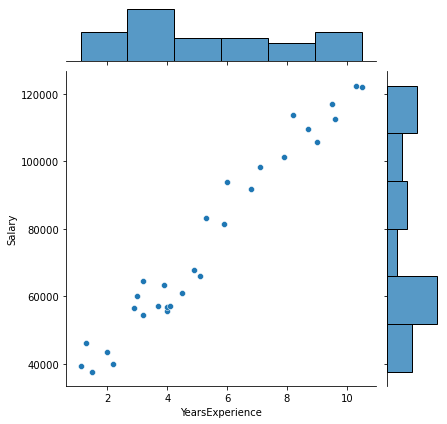

In [17]:
sns.jointplot(x='YearsExperience',y='Salary', data=pay_data)

In [18]:
# Its generating Almost linear Values::::

In [19]:
X=pay_data.iloc[:,:+1]
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [24]:
y=pay_data.iloc[:,1]
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [25]:
# Spliting the data into Train ans the Test dataSets:

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)
# 0.3 is the 30% test data 

In [28]:
len(X_test)

9

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred=model.predict(X_test)

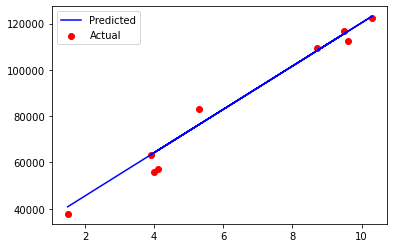

In [40]:
plt.scatter(X_test,y_test,color='red',label='Actual')
plt.plot(X_test,y_pred,'b-',label='Predicted')
plt.legend()
# To show the Desscription
plt.show()

In [48]:
b1=model.intercept_
b1

26777.391341197632

In [47]:
m1=model.coef_
m1

array([9360.26128619])

In [45]:
# Prdicting the value for 9.8 year of Experience :
model.predict([[9.8]])

array([118507.9519459])

In [52]:
# Checking the Value from General Method
y1=m1*9.8+b1
y1

array([118507.9519459])

In [49]:
model.predict([[18.89]])

array([203592.7270374])

In [53]:
y2=m1*18.89+b1
y2

array([203592.7270374])

In [63]:
model.score(X_test,y_test)
# This is R^2 Value:

0.9740993407213511

In [55]:
# maximum value is =1 
# Its very Decent value:

In [62]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE 3737.4178618788987
MSE 23370078.800832972
RMSE 61.13442452398566
